# **Import Libraries**

In [214]:
# ! pip install ephem
# ! pip install anfis
# ! pip install numpy matplotlib scikit-fuzzy
# ! pip install pydot
# ! pip install pandas
# ! pip install tensorflow==2.6.0
# ! pip install pickle
# ! pip install seaborn
# ! pip install matplotlib
# ! pip install scikit-learn
# ! pip install tensorflow==2.6.0


In [215]:
import glob, ephem, sys, os, logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle, joblib
sys.maxsize

from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from Models import myanfis
import tensorflow as tf

from tensorflow.keras.utils import plot_model

%matplotlib inline
logging.getLogger('tensorflow').disabled = True
plt.style.use('fivethirtyeight')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [216]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

----
# **Load the Dataset**

In [217]:
def get_dataset(folder_path):
    file_list = glob.glob(folder_path + "/*.csv") 
    main_dataframe = pd.DataFrame(pd.read_csv(file_list[0])) 
    for i in range(1, len(file_list)): 
        data = pd.read_csv(file_list[i]) 
        df = pd.DataFrame(data) 
        main_dataframe = pd.concat([main_dataframe,df],axis='index') 
    return main_dataframe

### Cape Ferguson dataset

In [218]:
df_CapeFerguson = get_dataset('Datasets/Cape Ferguson')
df_CapeFerguson['Cape Ferguson'] = 1 

In [219]:
df_CapeFerguson.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Cape Ferguson
0,01-Jan-1995 00:00,3.298,29.8,27.6,1013.0,-0.023,-0.026,106,7.7,5.6,1
1,01-Jan-1995 01:00,2.785,29.9,27.4,1012.5,-0.049,-0.053,85,7.5,5.1,1
2,01-Jan-1995 02:00,2.137,30.0,27.7,1011.7,-0.066,-0.074,81,6.7,3.7,1
3,01-Jan-1995 03:00,1.535,30.1,27.5,1011.4,-0.039,-0.055,87,5.2,3.4,1
4,01-Jan-1995 04:00,1.041,30.4,27.6,1010.5,-0.022,-0.041,72,6.2,4.7,1


In [220]:
df_CapeFerguson.isna().sum()

 Date & UTC Time       0
Sea Level              0
Water Temperature      0
Air Temperature        0
Barometric Pressure    0
Residuals              0
Adjusted Residuals     0
Wind Direction         0
Wind Gust              0
Wind Speed             0
Cape Ferguson          0
dtype: int64

### Rosslyn Bay dataset

In [221]:
df_RosslynBay = get_dataset('Datasets/Rosslyn Bay')
df_RosslynBay['Rosslyn Bay'] = 1

In [222]:
df_RosslynBay.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Rosslyn Bay
0,01-Jan-1995 00:00,4.657,28.5,-9999.0,1014.5,0.035,0.053,164,7.1,4.0,1
1,01-Jan-1995 01:00,4.063,28.5,-9999.0,1014.1,0.081,0.094,159,6.7,3.1,1
2,01-Jan-1995 02:00,3.089,28.6,-9999.0,1013.7,0.076,0.084,165,7.4,2.6,1
3,01-Jan-1995 03:00,1.982,28.6,-9999.0,1012.8,0.053,0.057,172,6.1,1.6,1
4,01-Jan-1995 04:00,1.067,28.8,-9999.0,1012.0,0.054,0.049,199,4.3,0.9,1


In [223]:
df_RosslynBay.isna().sum()

 Date & UTC Time       0
Sea Level              0
Water Temperature      0
Air Temperature        0
Barometric Pressure    0
Residuals              0
Adjusted Residuals     0
Wind Direction         0
Wind Gust              0
Wind Speed             0
Rosslyn Bay            0
dtype: int64

### Solomon Islands dataset

In [224]:
df_SolomonIslands = get_dataset('Datasets/Solomon Islands')
df_SolomonIslands['Solomon Islands'] = 1

In [225]:
df_SolomonIslands.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Solomon Islands
0,01-Jan-1995 00:00,0.790,28.7,28.1,1007.7,-0.108,-0.163,21,4.8,3.5,1
1,01-Jan-1995 01:00,0.847,28.9,28.2,1007.2,-0.074,-0.129,359,4.7,3.1,1
2,01-Jan-1995 02:00,0.870,29.1,28.2,1006.5,-0.084,-0.145,346,4.4,3.4,1
3,01-Jan-1995 03:00,0.883,29.2,28.1,1005.8,-0.113,-0.181,337,4.7,3.9,1
4,01-Jan-1995 04:00,0.878,29.5,28.8,1005.3,-0.142,-0.216,328,5.8,4.9,1


In [226]:
df_SolomonIslands.isna().sum()

 Date & UTC Time       0
Sea Level              0
Water Temperature      0
Air Temperature        0
Barometric Pressure    0
Residuals              0
Adjusted Residuals     0
Wind Direction         0
Wind Gust              0
Wind Speed             0
Solomon Islands        0
dtype: int64

### Vanuatu dataset

In [227]:
df_Vanuatu = get_dataset('Datasets/Vanuatu')
df_Vanuatu['Vanuatu'] = 1 

In [228]:
df_Vanuatu.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Vanuatu
0,01-Jan-1995 00:00,0.646,27.2,27.7,1008.9,-0.001,-0.043,48,5.4,3.0,1
1,01-Jan-1995 01:00,0.672,27.3,27.9,1008.6,-0.002,-0.046,43,6.7,2.5,1
2,01-Jan-1995 02:00,0.799,27.4,28.0,1008.1,-0.019,-0.066,24,7.0,1.3,1
3,01-Jan-1995 03:00,1.021,27.4,27.7,1007.7,-0.025,-0.077,45,7.2,3.0,1
4,01-Jan-1995 04:00,1.264,27.5,27.9,1007.0,-0.030,-0.086,52,5.9,4.0,1


In [229]:
df_Vanuatu.isna().sum()

 Date & UTC Time       0
Sea Level              0
Water Temperature      0
Air Temperature        0
Barometric Pressure    0
Residuals              0
Adjusted Residuals     0
Wind Direction         0
Wind Gust              0
Wind Speed             0
Vanuatu                0
dtype: int64

### Combine all the datasets

In [230]:
df = pd.concat([df_CapeFerguson, df_RosslynBay, df_SolomonIslands, df_Vanuatu], axis=0)

----
# **Pre Processing & EDA**

### Handle NULL values 

**Replace NULL values with 0**

In [231]:
df.isna().sum()

 Date & UTC Time            0
Sea Level                   0
Water Temperature           0
Air Temperature             0
Barometric Pressure         0
Residuals                   0
Adjusted Residuals          0
Wind Direction              0
Wind Gust                   0
Wind Speed                  0
Cape Ferguson          710064
Rosslyn Bay            710064
Solomon Islands        710064
Vanuatu                710064
dtype: int64

In [232]:
df = df.fillna(0)

In [233]:
df.isna().sum()

 Date & UTC Time       0
Sea Level              0
Water Temperature      0
Air Temperature        0
Barometric Pressure    0
Residuals              0
Adjusted Residuals     0
Wind Direction         0
Wind Gust              0
Wind Speed             0
Cape Ferguson          0
Rosslyn Bay            0
Solomon Islands        0
Vanuatu                0
dtype: int64

In [234]:
df.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Cape Ferguson,Rosslyn Bay,Solomon Islands,Vanuatu
0,01-Jan-1995 00:00,3.298,29.8,27.6,1013.0,-0.023,-0.026,106,7.7,5.6,1.0,0.0,0.0,0.0
1,01-Jan-1995 01:00,2.785,29.9,27.4,1012.5,-0.049,-0.053,85,7.5,5.1,1.0,0.0,0.0,0.0
2,01-Jan-1995 02:00,2.137,30.0,27.7,1011.7,-0.066,-0.074,81,6.7,3.7,1.0,0.0,0.0,0.0
3,01-Jan-1995 03:00,1.535,30.1,27.5,1011.4,-0.039,-0.055,87,5.2,3.4,1.0,0.0,0.0,0.0
4,01-Jan-1995 04:00,1.041,30.4,27.6,1010.5,-0.022,-0.041,72,6.2,4.7,1.0,0.0,0.0,0.0


**Convert -9999 values to NULL**

In [235]:
df.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Cape Ferguson,Rosslyn Bay,Solomon Islands,Vanuatu
0,01-Jan-1995 00:00,3.298,29.8,27.6,1013.0,-0.023,-0.026,106,7.7,5.6,1.0,0.0,0.0,0.0
1,01-Jan-1995 01:00,2.785,29.9,27.4,1012.5,-0.049,-0.053,85,7.5,5.1,1.0,0.0,0.0,0.0
2,01-Jan-1995 02:00,2.137,30.0,27.7,1011.7,-0.066,-0.074,81,6.7,3.7,1.0,0.0,0.0,0.0
3,01-Jan-1995 03:00,1.535,30.1,27.5,1011.4,-0.039,-0.055,87,5.2,3.4,1.0,0.0,0.0,0.0
4,01-Jan-1995 04:00,1.041,30.4,27.6,1010.5,-0.022,-0.041,72,6.2,4.7,1.0,0.0,0.0,0.0


In [236]:
df.replace(-9999, np.nan, inplace=True)

In [237]:
df.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Cape Ferguson,Rosslyn Bay,Solomon Islands,Vanuatu
0,01-Jan-1995 00:00,3.298,29.8,27.6,1013.0,-0.023,-0.026,106.0,7.7,5.6,1.0,0.0,0.0,0.0
1,01-Jan-1995 01:00,2.785,29.9,27.4,1012.5,-0.049,-0.053,85.0,7.5,5.1,1.0,0.0,0.0,0.0
2,01-Jan-1995 02:00,2.137,30.0,27.7,1011.7,-0.066,-0.074,81.0,6.7,3.7,1.0,0.0,0.0,0.0
3,01-Jan-1995 03:00,1.535,30.1,27.5,1011.4,-0.039,-0.055,87.0,5.2,3.4,1.0,0.0,0.0,0.0
4,01-Jan-1995 04:00,1.041,30.4,27.6,1010.5,-0.022,-0.041,72.0,6.2,4.7,1.0,0.0,0.0,0.0


In [238]:
df.isna().sum()

 Date & UTC Time           0
Sea Level              11767
Water Temperature      56116
Air Temperature        60784
Barometric Pressure    12303
Residuals              11547
Adjusted Residuals     15074
Wind Direction         50663
Wind Gust              38453
Wind Speed             38824
Cape Ferguson              0
Rosslyn Bay                0
Solomon Islands            0
Vanuatu                    0
dtype: int64

In [239]:
df.shape

(946752, 14)

**Drop NULL values**

In [240]:
df = df.dropna()

In [241]:
df.isna().sum()

 Date & UTC Time       0
Sea Level              0
Water Temperature      0
Air Temperature        0
Barometric Pressure    0
Residuals              0
Adjusted Residuals     0
Wind Direction         0
Wind Gust              0
Wind Speed             0
Cape Ferguson          0
Rosslyn Bay            0
Solomon Islands        0
Vanuatu                0
dtype: int64

In [242]:
df.shape

(815092, 14)

In [243]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815092 entries, 0 to 3695
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0    Date & UTC Time     815092 non-null  object 
 1   Sea Level            815092 non-null  float64
 2   Water Temperature    815092 non-null  float64
 3   Air Temperature      815092 non-null  float64
 4   Barometric Pressure  815092 non-null  float64
 5   Residuals            815092 non-null  float64
 6   Adjusted Residuals   815092 non-null  float64
 7   Wind Direction       815092 non-null  float64
 8   Wind Gust            815092 non-null  float64
 9   Wind Speed           815092 non-null  float64
 10  Cape Ferguson        815092 non-null  float64
 11  Rosslyn Bay          815092 non-null  float64
 12  Solomon Islands      815092 non-null  float64
 13  Vanuatu              815092 non-null  float64
dtypes: float64(13), object(1)
memory usage: 93.3+ MB


### Date & UTC Time

In [244]:
df.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Cape Ferguson,Rosslyn Bay,Solomon Islands,Vanuatu
0,01-Jan-1995 00:00,3.298,29.8,27.6,1013.0,-0.023,-0.026,106.0,7.7,5.6,1.0,0.0,0.0,0.0
1,01-Jan-1995 01:00,2.785,29.9,27.4,1012.5,-0.049,-0.053,85.0,7.5,5.1,1.0,0.0,0.0,0.0
2,01-Jan-1995 02:00,2.137,30.0,27.7,1011.7,-0.066,-0.074,81.0,6.7,3.7,1.0,0.0,0.0,0.0
3,01-Jan-1995 03:00,1.535,30.1,27.5,1011.4,-0.039,-0.055,87.0,5.2,3.4,1.0,0.0,0.0,0.0
4,01-Jan-1995 04:00,1.041,30.4,27.6,1010.5,-0.022,-0.041,72.0,6.2,4.7,1.0,0.0,0.0,0.0


In [245]:
dateTime_dummies = pd.DataFrame()
df[' Date & UTC Time'] = pd.to_datetime(df[' Date & UTC Time'])

In [246]:
def plot_sea_level_for_stations(data, stations):
    
    for station in stations:
        if station in data.columns:
            filtered_data = df[df[station] == True]
            plt.figure(figsize=(9, 3))
            sns.scatterplot(data=filtered_data, x=filtered_data[' Date & UTC Time'], y='Sea Level')
            plt.title(f'Sea Level for {station}')
            plt.xlabel('Date')
            plt.ylabel('Sea Level')
            plt.show()
        else:
            print(f"Station '{station}' not found in the data.")
    
    plt.figure(figsize=(9, 3))
    sns.scatterplot(data=df, x=df[' Date & UTC Time'], y='Sea Level')
    plt.title('Combined Sea Level')
    plt.xlabel('Date')
    plt.ylabel('Sea Level')
    plt.show()
    

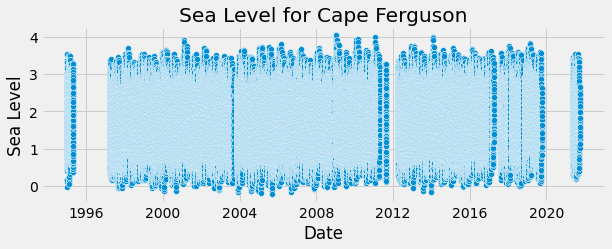

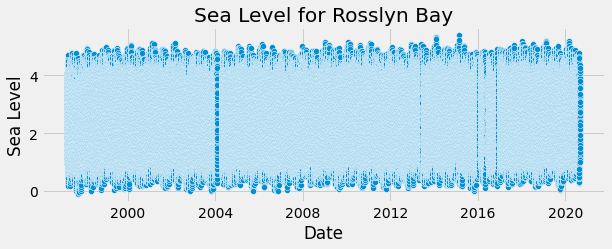

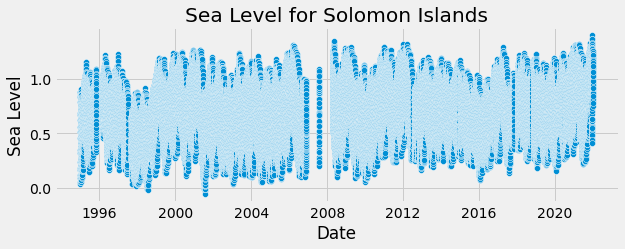

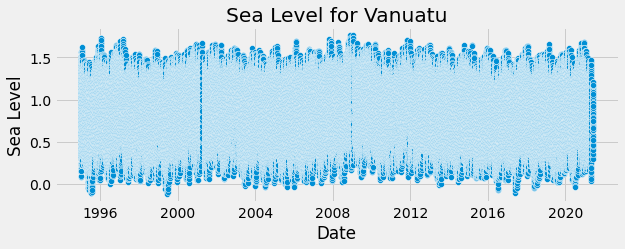

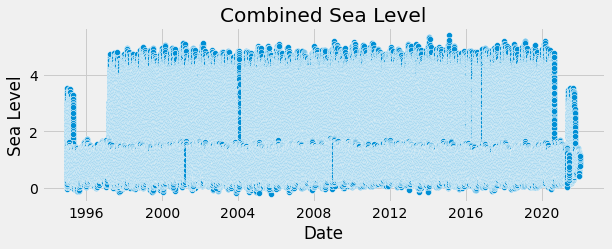

In [247]:
stations = ['Cape Ferguson', 'Rosslyn Bay', 'Solomon Islands', 'Vanuatu']
color_palette = sns.color_palette("tab10")

plot_sea_level_for_stations(df, stations)

In [248]:
def create_features_datetime(df, column):
    df = df.copy()
    df['hour'] = df[column].dt.hour
    df['dayofweek'] = df[column].dt.dayofweek
    df['quarter'] = df[column].dt.quarter
    df['month'] = df[column].dt.month
    df['year'] = df[column].dt.year
    df['dayofyear'] = df[column].dt.dayofyear
    df['dayofmonth'] = df[column].dt.day
    df['weekofyear'] = df[column].dt.isocalendar().week.astype(int)
    return df 

In [249]:
df = create_features_datetime(df, ' Date & UTC Time')

In [250]:
df.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Cape Ferguson,Rosslyn Bay,Solomon Islands,Vanuatu,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,1995-01-01 00:00:00,3.298,29.8,27.6,1013.0,-0.023,-0.026,106.0,7.7,5.6,1.0,0.0,0.0,0.0,0,6,1,1,1995,1,1,52
1,1995-01-01 01:00:00,2.785,29.9,27.4,1012.5,-0.049,-0.053,85.0,7.5,5.1,1.0,0.0,0.0,0.0,1,6,1,1,1995,1,1,52
2,1995-01-01 02:00:00,2.137,30.0,27.7,1011.7,-0.066,-0.074,81.0,6.7,3.7,1.0,0.0,0.0,0.0,2,6,1,1,1995,1,1,52
3,1995-01-01 03:00:00,1.535,30.1,27.5,1011.4,-0.039,-0.055,87.0,5.2,3.4,1.0,0.0,0.0,0.0,3,6,1,1,1995,1,1,52
4,1995-01-01 04:00:00,1.041,30.4,27.6,1010.5,-0.022,-0.041,72.0,6.2,4.7,1.0,0.0,0.0,0.0,4,6,1,1,1995,1,1,52


### Sea Level

In [251]:
# Summary Statistics
df['Sea Level'].describe()

count    815092.000000
mean          1.414445
std           0.957425
min          -0.222000
25%           0.729000
50%           1.079000
75%           1.892000
max           5.393000
Name: Sea Level, dtype: float64

In [252]:
# # Time Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='year', y='Sea Level')
# plt.title('Sea Level over Time')
# plt.xlabel('Date')
# plt.ylabel('Sea Level')
# plt.show()

### Water Temprature

In [253]:
# Summary Statistics
df['Water Temperature'].describe()

count    815092.000000
mean         26.712985
std           3.035498
min          15.300000
25%          25.100000
50%          27.500000
75%          29.100000
max          33.500000
Name: Water Temperature, dtype: float64

In [254]:
# # Distribution Analysis
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='Water Temperature', bins=30, kde=True)
# plt.title('Distribution of Water Temperature')
# plt.xlabel('Water Temperature')
# plt.ylabel('Frequency')
# plt.show()

In [255]:
# # Relationship with Sea Level
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Water Temperature', y='Sea Level')
# plt.title('Sea Level vs Water Temperature')
# plt.xlabel('Water Temperature')
# plt.ylabel('Sea Level')
# plt.show()

In [256]:
# # Time Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='year', y='Water Temperature')
# plt.title('Water Temperature over Time')
# plt.xlabel('Date')
# plt.ylabel('Water Temperature')
# plt.show()

### Air Temperature

In [257]:
# Summary Statistics
df['Air Temperature'].describe()

count    815092.000000
mean         24.870241
std           3.266071
min           8.300000
25%          23.100000
50%          25.300000
75%          27.100000
max          37.400000
Name: Air Temperature, dtype: float64

In [258]:
# # Distribution Analysis
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='Air Temperature', bins=30, kde=True)
# plt.title('Distribution of Air Temperature')
# plt.xlabel('Air Temperature')
# plt.ylabel('Frequency')
# plt.show()

In [259]:
# # Relationship with Sea Level
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Air Temperature', y='Sea Level')
# plt.title('Sea Level vs Air Temperature')
# plt.xlabel('Air Temperature')
# plt.ylabel('Sea Level')
# plt.show()


In [260]:
# # Time Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='year', y='Air Temperature')
# plt.title('Air Temperature over Time')
# plt.xlabel('Date')
# plt.ylabel('Air Temperature')
# plt.show()

### Barometric Pressure

In [261]:
# Summary Statistics
df['Barometric Pressure'].describe()

count    815092.000000
mean       1011.733370
std           4.562847
min         942.900000
25%        1008.600000
50%        1011.300000
75%        1014.800000
max        1029.500000
Name: Barometric Pressure, dtype: float64

In [262]:
# # Distribution Analysis
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='Barometric Pressure', bins=30, kde=True)
# plt.title('Distribution of Barometric Pressure')
# plt.xlabel('Barometric Pressure')
# plt.ylabel('Frequency')
# plt.show()

In [263]:
# # Relationship with Sea Level
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Barometric Pressure', y='Sea Level')
# plt.title('Sea Level vs Barometric Pressure')
# plt.xlabel('Barometric Pressure')
# plt.ylabel('Sea Level')
# plt.show()

In [264]:
# # Time Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='year', y='Barometric Pressure')
# plt.title('Barometric Pressure over Time')
# plt.xlabel('Date')
# plt.ylabel('Barometric Pressure')
# plt.show()

### Wind Direction

In [265]:
# Summary Statistics
df['Wind Direction'].describe()

count    815092.000000
mean        153.019812
std          84.114725
min           0.000000
25%          81.000000
50%         162.000000
75%         193.000000
max         999.000000
Name: Wind Direction, dtype: float64

In [266]:
# # Distribution Analysis
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='Wind Direction', bins=30, kde=True)
# plt.title('Distribution of Wind Direction')
# plt.xlabel('Wind Direction')
# plt.ylabel('Frequency')
# plt.show()

In [267]:
# # Time Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='year', y='Wind Direction')
# plt.title('Wind Direction over Time')
# plt.xlabel('Date')
# plt.ylabel('Wind Direction')
# plt.show()

### Wind Gust

In [268]:
# Summary Statistics
df['Wind Gust'].describe()

count    815092.000000
mean          5.166206
std           2.748340
min           0.000000
25%           3.100000
50%           4.800000
75%           6.800000
max          37.500000
Name: Wind Gust, dtype: float64

In [269]:
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='Wind Gust', bins=30, kde=True)
# plt.title('Distribution of Wind Gust')
# plt.xlabel('Wind Gust')
# plt.ylabel('Frequency')
# plt.show()

In [270]:
# # Relationship with Sea Level
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Wind Gust', y='Sea Level')
# plt.title('Sea Level vs Wind Gust')
# plt.xlabel('Wind Gust')
# plt.ylabel('Sea Level')
# plt.show()

In [271]:
# # Time Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='year', y='Wind Gust')
# plt.title('Wind Gust over Time')
# plt.xlabel('Date')
# plt.ylabel('Wind Gust')
# plt.show()

### Wind Speed

In [272]:
# Summary Statistics
df['Wind Speed'].describe()

count    815092.000000
mean          2.769897
std           2.093431
min           0.000000
25%           1.100000
50%           2.400000
75%           3.900000
max          27.000000
Name: Wind Speed, dtype: float64

In [273]:
# # Distribution Analysis
# plt.figure(figsize=(10, 6))
# sns.histplot(data=df, x='Wind Speed', bins=30, kde=True)
# plt.title('Distribution of Wind Speed')
# plt.xlabel('Wind Speed')
# plt.ylabel('Frequency')
# plt.show()

In [274]:
# # Relationship with Sea Level
# plt.figure(figsize=(10, 6))
# sns.scatterplot(data=df, x='Wind Speed', y='Sea Level')
# plt.title('Sea Level vs Wind Speed')
# plt.xlabel('Wind Speed')
# plt.ylabel('Sea Level')
# plt.show()

In [275]:
# # Time Trends
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=df, x='year', y='Wind Speed')
# plt.title('Wind Speed over Time')
# plt.xlabel('Date')
# plt.ylabel('Wind Speed')
# plt.show()

# **Removing Outliers**

In [276]:
# Calculate IQR for Sea Level
Q1 = df['Sea Level'].quantile(0.25)
Q3 = df['Sea Level'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_clean = df[(df['Sea Level'] >= lower_bound) & (df['Sea Level'] <= upper_bound)]

print("Original Shape:", df.shape)
print("Shape after removing outliers:", df_clean.shape)

Original Shape: (815092, 22)
Shape after removing outliers: (783249, 22)


In [277]:
df_clean = df_clean.reset_index()
df_clean = df_clean.drop(columns='index')

In [278]:
df_clean.head()

,Date & UTC Time,Sea Level,Water Temperature,Air Temperature,Barometric Pressure,Residuals,Adjusted Residuals,Wind Direction,Wind Gust,Wind Speed,Cape Ferguson,Rosslyn Bay,Solomon Islands,Vanuatu,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,1995-01-01 00:00:00,3.298,29.8,27.6,1013.0,-0.023,-0.026,106.0,7.7,5.6,1.0,0.0,0.0,0.0,0,6,1,1,1995,1,1,52
1,1995-01-01 01:00:00,2.785,29.9,27.4,1012.5,-0.049,-0.053,85.0,7.5,5.1,1.0,0.0,0.0,0.0,1,6,1,1,1995,1,1,52
2,1995-01-01 02:00:00,2.137,30.0,27.7,1011.7,-0.066,-0.074,81.0,6.7,3.7,1.0,0.0,0.0,0.0,2,6,1,1,1995,1,1,52
3,1995-01-01 03:00:00,1.535,30.1,27.5,1011.4,-0.039,-0.055,87.0,5.2,3.4,1.0,0.0,0.0,0.0,3,6,1,1,1995,1,1,52
4,1995-01-01 04:00:00,1.041,30.4,27.6,1010.5,-0.022,-0.041,72.0,6.2,4.7,1.0,0.0,0.0,0.0,4,6,1,1,1995,1,1,52


----
# **Feature Selection**

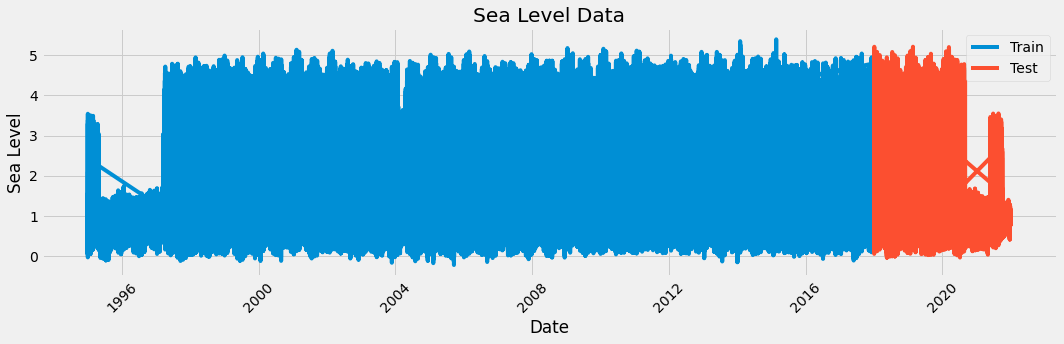

In [279]:
# Filter the data for training and testing
df = df.fillna(0)
train = df[df[' Date & UTC Time'] < pd.Timestamp('2018-01-01')]
test = df[df[' Date & UTC Time'] >= pd.Timestamp('2018-01-01')]

# Plotting the data
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(train[' Date & UTC Time'], train['Sea Level'], label='Train')
ax.plot(test[' Date & UTC Time'], test['Sea Level'], label='Test')
ax.set_xlabel('Date')
ax.set_ylabel('Sea Level')
ax.set_title('Sea Level Data')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [280]:
df = df.drop(columns=['Cape Ferguson', 'Rosslyn Bay', 'Solomon Islands', 'Vanuatu'])

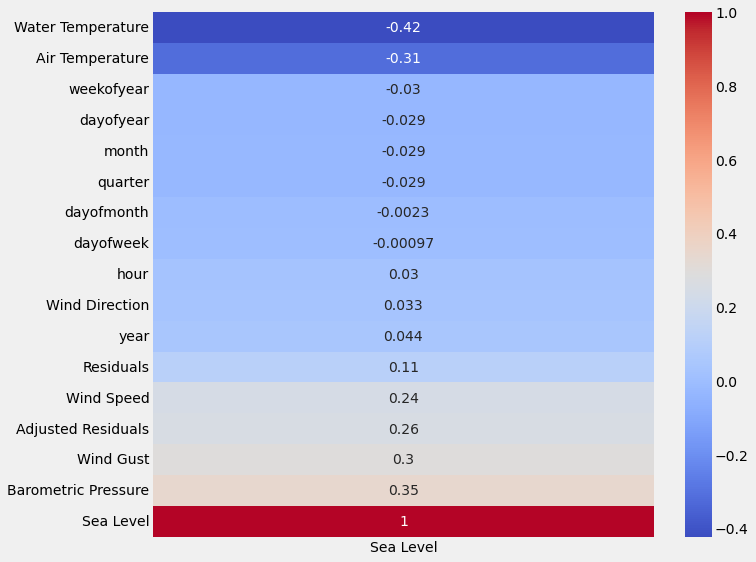

In [281]:
plt.figure(figsize=(10, 9))
corr = df.drop(columns=' Date & UTC Time').corr()
sns.heatmap(corr[['Sea Level']].sort_values(by='Sea Level'), annot=True, cmap='coolwarm')
plt.show()

In [282]:
X = df.drop(columns=['Sea Level', ' Date & UTC Time']) 
selector_percentile = SelectPercentile(percentile=50)
percentile = selector_percentile.fit_transform(X, df['Sea Level'])
selected_indices = selector_percentile.get_support(indices=True)
selected_features = train.columns[selected_indices]
selected_features

Index([' Date & UTC Time', 'Sea Level', 'Water Temperature', 'Air Temperature',
       'Barometric Pressure', 'Adjusted Residuals', 'Wind Direction',
       'Wind Gust'],
      dtype='object')

In [283]:
df_selected_feature = df[selected_features]

----
# **Model Multiple Linear Regression**

In [284]:
# Define the target and features
target_column = 'Sea Level'
feature_columns = ['Water Temperature', 'Air Temperature', 'Barometric Pressure', 
                   'Adjusted Residuals', 'Wind Direction', 'Wind Gust']

# Create a pipeline with MinMaxScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),  # Step 1: MinMaxScaler for normalization
    ('regressor', LinearRegression())  # Step 2: LinearRegression model
])

df_temp = df_selected_feature.copy()

# Apply MinMaxScaler to selected features within the pipeline
df_temp[feature_columns] = pipeline.named_steps['scaler'].fit_transform(df_temp[feature_columns])

# Splitting into train and test based on date
train = df_temp[df_temp[' Date & UTC Time'] < pd.Timestamp('2018-01-01')]
test = df_temp[df_temp[' Date & UTC Time'] >= pd.Timestamp('2018-01-01')]

# Remove the timestamp column
train = train.drop(columns=' Date & UTC Time')
test = test.drop(columns=' Date & UTC Time')

# Selecting features and target for training set
X_train = train[feature_columns]  
y_train = train[[target_column]]     

# Selecting features and target for testing set
X_test = test[feature_columns]    
y_test = test[[target_column]] 

# Ensure X_train and X_test shapes are compatible with batch_size
remainder_train = len(X_train) % 32
remainder_test = len(X_test) % 32

if remainder_train != 0:
    X_train = X_train.iloc[:-remainder_train]
    y_train = y_train.iloc[:-remainder_train]

if remainder_test != 0:
    X_test = X_test.iloc[:-remainder_test]
    y_test = y_test.iloc[:-remainder_test]

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

# Fit the pipeline (including scaling) on the training data
pipeline.fit(X_train, y_train)

# Save the model using joblib
joblib.dump(pipeline, 'linear_regression_pipeline.pkl')

# Predict and evaluate
linReg_y_pred = pipeline.predict(X_test)
linReg_r_squared = r2_score(y_test, linReg_y_pred)
linReg_mse = mean_squared_error(y_test, linReg_y_pred)
linReg_mae = mean_absolute_error(y_test, linReg_y_pred)

print("\nR-squared:", linReg_r_squared)
print("Mean Squared Error:", linReg_mse)
print("Mean Absolute Error:", linReg_mae)

X_train shape: (715328, 6)
y_train shape: (715328, 1)
X_test shape: (99712, 6)
y_test shape: (99712, 1)

R-squared: 0.29082862978742774
Mean Squared Error: 0.6403636790692129
Mean Absolute Error: 0.5740184878673706


In [285]:
# Load the new dataset
df_test = pd.read_csv('Test_Rosslyn_Bay_2024.csv')

# Define the necessary columns for prediction
feature_columns = ['Water Temperature', 'Air Temperature', 'Barometric Pressure',
                   'Adjusted Residuals', 'Wind Direction', 'Wind Gust']

# Load the trained pipeline
pipeline = joblib.load('linear_regression_pipeline.pkl')

# Transform the test data using the MinMaxScaler from the pipeline
scaler = pipeline.named_steps['scaler']
df_test_scaled = scaler.transform(df_test[feature_columns])

# Predict sea level values
sea_level_predicted = pipeline.predict(df_test_scaled)

# Add the predicted values as a new column in the original DataFrame
df_test['Predicted Sea Level'] = sea_level_predicted / 1000

# Display the predicted values
print(df_test[[' Date & UTC Time', 'Predicted Sea Level']])


     Date & UTC Time  Predicted Sea Level
0      1/1/2024 0:00             0.782132
1      1/1/2024 1:00             0.782818
2      1/1/2024 2:00             0.784707
3      1/1/2024 3:00             0.785012
4      1/1/2024 4:00             0.789937
5      1/1/2024 5:00             0.840997
6      1/1/2024 6:00             0.806197
7      1/1/2024 7:00             0.777984
8      1/1/2024 8:00             0.796164
9      1/1/2024 9:00             0.804786
10    1/1/2024 10:00             0.792661
11    1/1/2024 11:00             0.808399
12    1/1/2024 12:00             0.805404
13    1/1/2024 13:00             0.807383
14    1/1/2024 14:00             0.802339
15    1/1/2024 15:00             0.818144
16    1/1/2024 16:00             0.785393
17    1/1/2024 17:00             0.799921
18    1/1/2024 18:00             0.791178
19    1/1/2024 19:00             0.792438
20    1/1/2024 20:00             0.788178
21    1/1/2024 21:00             0.792158
22    1/1/2024 22:00             0

In [286]:
# # Define the target and features
# target_column = 'Sea Level'
# feature_columns = ['Water Temperature', 'Air Temperature', 'Barometric Pressure', 
#                    'Adjusted Residuals', 'Wind Direction', 'Wind Gust']

# # Create a pipeline with StandardScaler and LinearRegression
# pipeline = Pipeline([
#     ('scaler', StandardScaler()),  # Step 1: StandardScaler for normalization
#     ('regressor', LinearRegression())  # Step 2: LinearRegression model
# ])

# df_temp = df_selected_feature.copy()

# # Apply StandardScaler to selected features within the pipeline
# df_temp[feature_columns] = pipeline.named_steps['scaler'].fit_transform(df_temp[feature_columns])

# # Splitting into train and test based on date
# train = df_temp[df_temp[' Date & UTC Time'] < pd.Timestamp('2018-01-01')]
# test = df_temp[df_temp[' Date & UTC Time'] >= pd.Timestamp('2018-01-01')]

# # Remove the timestamp column
# train = train.drop(columns=' Date & UTC Time')
# test = test.drop(columns=' Date & UTC Time')

# # Selecting features and target for training set
# X_train = train[feature_columns]  
# y_train = train[[target_column]]     

# # Selecting features and target for testing set
# X_test = test[feature_columns]    
# y_test = test[[target_column]]   

# # Ensure X_train and X_test shapes are compatible with batch_size
# remainder_train = len(X_train) % 32
# remainder_test = len(X_test) % 32

# if remainder_train != 0:
#     X_train = X_train.iloc[:-remainder_train]
#     y_train = y_train.iloc[:-remainder_train]

# if remainder_test != 0:
#     X_test = X_test.iloc[:-remainder_test]
#     y_test = y_test.iloc[:-remainder_test]

# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

# # Fit the pipeline (including scaling) on the training data
# pipeline.fit(X_train, y_train)

# # Save the model using joblib
# joblib.dump(pipeline, 'linear_regression_pipeline.pkl')

# # Load the model from file
# # loaded_pipeline = joblib.load('linear_regression_pipeline.pkl')

# # Predict and evaluate
# linReg_y_pred = pipeline.predict(X_test)
# linReg_r_squared = r2_score(y_test, linReg_y_pred)
# linReg_mse = mean_squared_error(y_test, linReg_y_pred)
# linReg_mae = mean_absolute_error(y_test, linReg_y_pred)

# print("\nR-squared:", linReg_r_squared)
# print("Mean Squared Error:", linReg_mse)
# print("Mean Absolute Error:", linReg_mae)

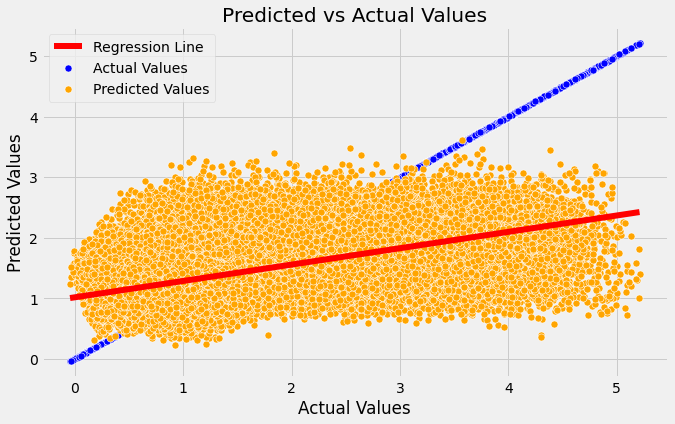

In [287]:
y_test_values = y_test.values.flatten()  # Flatten to handle if y_test has more than one column

plt.figure(figsize=(10, 6))

# Plotting actual vs predicted values
sns.scatterplot(x=y_test_values, y=y_test_values, color='blue', label='Actual Values', s=50)
sns.scatterplot(x=y_test_values, y=linReg_y_pred.flatten(), color='orange', label='Predicted Values', s=50)
sns.regplot(x=y_test_values, y=linReg_y_pred.flatten(), scatter=False, line_kws={'color': 'red'}, label='Regression Line')

plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

----
# **Model ANFIS**

In [288]:
# features_to_normalize = ['Water Temperature', 'Air Temperature', 'Barometric Pressure', 
#                          'Adjusted Residuals', 'Wind Direction', 'Wind Gust']

# minmaxScaler = MinMaxScaler()

# df_temp = df_selected_feature.copy()

# df_temp[features_to_normalize] = minmaxScaler.fit_transform(df_temp[features_to_normalize])

# # Splitting into train and test based on date
# train = df_temp[df_temp[' Date & UTC Time'] < pd.Timestamp('2018-01-01')]
# test = df_temp[df_temp[' Date & UTC Time'] >= pd.Timestamp('2018-01-01')]

# train = train.drop(columns=' Date & UTC Time')
# test = test.drop(columns=' Date & UTC Time')

# # Selecting features and target for training set
# X_train = train.iloc[:, 1:]  
# y_train = train.iloc[:, :1]     

# # Selecting features and target for testing set
# X_test = test.iloc[:, 1:]    
# y_test = test.iloc[:, :1]       

# # Ensure X_train and X_test shapes are compatible with batch_size
# remainder_train = len(X_train) % 32
# remainder_test = len(X_test) % 32

# if remainder_train != 0:
#     X_train = X_train.iloc[:-remainder_train]
#     y_train = y_train.iloc[:-remainder_train]

# if remainder_test != 0:
#     X_test = X_test.iloc[:-remainder_test]
#     y_test = y_test.iloc[:-remainder_test]

# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}\n')

# param = myanfis.fis_parameters(
#         n_input = 6,                # no. of Regressors
#         n_memb = 2,                 # no. of fuzzy memberships
#         batch_size = 32,            # 16 / 32 / 64 / ...
#         memb_func = 'gaussian',      # 'gaussian' / 'gbellmf' / 'sigmoid'
#         optimizer = 'adam',          # sgd / adam / ...
#         loss = tf.keras.losses.MeanAbsoluteError(),               # mse / mae / huber_loss / mean_absolute_percentage_error / ...
#         n_epochs = 100              # 10 / 25 / 50 / 100 / ...
#         )

# histories = []

# fis = myanfis.ANFIS(n_input = param.n_input,
#                     n_memb = param.n_memb,
#                     batch_size = param.batch_size,
#                     memb_func = param.memb_func,
#                     name = 'firstAnfis' 
#                     )

# fis.model.compile(optimizer=param.optimizer,
#                       loss=param.loss,
#                       metrics=['mae', 'mse']
#                       )

# history = fis.fit(X_train, y_train,
#                   epochs=param.n_epochs,
#                   batch_size=param.batch_size,
#                   validation_data = (X_test, y_test),
#                   )

# histories.append(history)

In [289]:
# Define the target and features
target_column = 'Sea Level'
feature_columns = ['Water Temperature', 'Air Temperature', 'Barometric Pressure', 
                   'Adjusted Residuals', 'Wind Direction', 'Wind Gust']

# Initialize MinMaxScaler
minmaxScaler = MinMaxScaler()

# Create a copy of the selected features DataFrame
df_temp = df_selected_feature.copy()

# Normalize the specified features
df_temp[feature_columns] = minmaxScaler.fit_transform(df_temp[feature_columns])

# Splitting into train and test based on date
train = df_temp[df_temp[' Date & UTC Time'] < pd.Timestamp('2018-01-01')]
test = df_temp[df_temp[' Date & UTC Time'] >= pd.Timestamp('2018-01-01')]

train = train.drop(columns=' Date & UTC Time')
test = test.drop(columns=' Date & UTC Time')

# Selecting features and target for training set
X_train = train[feature_columns]  
y_train = train[[target_column]]     

# Selecting features and target for testing set
X_test = test[feature_columns]    
y_test = test[[target_column]]       

# Ensure X_train and X_test shapes are compatible with batch_size
remainder_train = len(X_train) % 32
remainder_test = len(X_test) % 32

if remainder_train != 0:
    X_train = X_train.iloc[:-remainder_train]
    y_train = y_train.iloc[:-remainder_train]

if remainder_test != 0:
    X_test = X_test.iloc[:-remainder_test]
    y_test = y_test.iloc[:-remainder_test]

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}\n')

# Define ANFIS model parameters
param = myanfis.fis_parameters(
    n_input=len(feature_columns),  # Number of Regressors
    n_memb=2,                      # Number of fuzzy memberships
    batch_size=32,                 # Batch size
    memb_func='gaussian',          # Membership function
    optimizer='adam',              # Optimizer
    loss=tf.keras.losses.MeanAbsoluteError(),  # Loss function
    n_epochs=25                   # Number of epochs
)

histories = []

# Initialize ANFIS model
fis = myanfis.ANFIS(n_input=param.n_input,
                    n_memb=param.n_memb,
                    batch_size=param.batch_size,
                    memb_func=param.memb_func,
                    name='firstAnfis'
                    )

# Compile ANFIS model
fis.model.compile(optimizer=param.optimizer,
                  loss=param.loss,
                  metrics=['mae', 'mse']
                  )

# Train ANFIS model
history = fis.fit(X_train, y_train,
                  epochs=param.n_epochs,
                  batch_size=param.batch_size,
                  validation_data=(X_test, y_test),
                  )

histories.append(history)

X_train shape: (715328, 6)
y_train shape: (715328, 1)
X_test shape: (99712, 6)
y_test shape: (99712, 1)

Epoch 1/25
22354/22354 [==============================] - 25s 1ms/step - loss: 0.6006 - mae: 0.6006 - mse: 0.7425 - val_loss: 0.5392 - val_mae: 0.5392 - val_mse: 0.6533
Epoch 2/25
22354/22354 [==============================] - 28s 1ms/step - loss: 0.5869 - mae: 0.5869 - mse: 0.7148 - val_loss: 0.5362 - val_mae: 0.5362 - val_mse: 0.6395
Epoch 3/25
22354/22354 [==============================] - 23s 1ms/step - loss: 0.5826 - mae: 0.5826 - mse: 0.7044 - val_loss: 0.5299 - val_mae: 0.5299 - val_mse: 0.6449
Epoch 4/25
22354/22354 [==============================] - 23s 1ms/step - loss: 0.5796 - mae: 0.5796 - mse: 0.6965 - val_loss: 0.5282 - val_mae: 0.5282 - val_mse: 0.6163
Epoch 5/25
22354/22354 [==============================] - 25s 1ms/step - loss: 0.5774 - mae: 0.5774 - mse: 0.6904 - val_loss: 0.5277 - val_mae: 0.5277 - val_mse: 0.6128
Epoch 6/25
22354/22354 [==========================

In [290]:
# # Define features to normalize
# features_to_normalize = ['Water Temperature', 'Air Temperature', 'Barometric Pressure', 
#                          'Adjusted Residuals', 'Wind Direction', 'Wind Gust']

# # Create MinMaxScaler instance
# minmaxScaler = MinMaxScaler()

# df_temp = df_selected_feature.copy()

# # Apply MinMaxScaler to selected features
# df_temp[features_to_normalize] = minmaxScaler.fit_transform(df_temp[features_to_normalize])

# # Splitting into train and test based on date
# train = df_temp[df_temp[' Date & UTC Time'] < pd.Timestamp('2018-01-01')]
# test = df_temp[df_temp[' Date & UTC Time'] >= pd.Timestamp('2018-01-01')]

# # Drop timestamp column
# train = train.drop(columns=' Date & UTC Time')
# test = test.drop(columns=' Date & UTC Time')

# # Selecting features and target for training set
# X_train = train.iloc[:, 1:]  
# y_train = train.iloc[:, :1]  

# # Selecting features and target for testing set
# X_test = test.iloc[:, 1:]    
# y_test = test.iloc[:, :1]    

# # Ensure X_train and X_test shapes are compatible with batch_size
# remainder_train = len(X_train) % 32
# remainder_test = len(X_test) % 32

# if remainder_train != 0:
#     X_train = X_train.iloc[:-remainder_train]
#     y_train = y_train.iloc[:-remainder_train]

# if remainder_test != 0:
#     X_test = X_test.iloc[:-remainder_test]
#     y_test = y_test.iloc[:-remainder_test]

# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}\n')

# # Define ANFIS model parameters
# param = myanfis.fis_parameters(
#     n_input=6,                    # Number of Regressors
#     n_memb=2,                     # Number of fuzzy memberships
#     batch_size=32,                # Batch size
#     memb_func='gaussian',         # Membership function type
#     optimizer='adam',             # Optimizer
#     loss=tf.keras.losses.MeanAbsoluteError(),  # Loss function
#     n_epochs=100                   # Number of epochs
# )

# # Create ANFIS model
# fis = myanfis.ANFIS(
#     n_input=param.n_input,
#     n_memb=param.n_memb,
#     batch_size=param.batch_size,
#     memb_func=param.memb_func,
#     name='firstAnfis'
# )

# # Compile ANFIS model
# fis.model.compile(
#     optimizer=param.optimizer,
#     loss=param.loss,
#     metrics=['mae', 'mse']
# )

# # Create a pipeline with MinMaxScaler and ANFIS model
# pipeline = Pipeline([
#     ('scaler', MinMaxScaler()),
#     ('anfis', fis)
# ])

# # Fit the pipeline on training data
# pipeline.fit(X_train[features_to_normalize], y_train)

# dump(pipeline, 'anfis_pipeline.joblib')

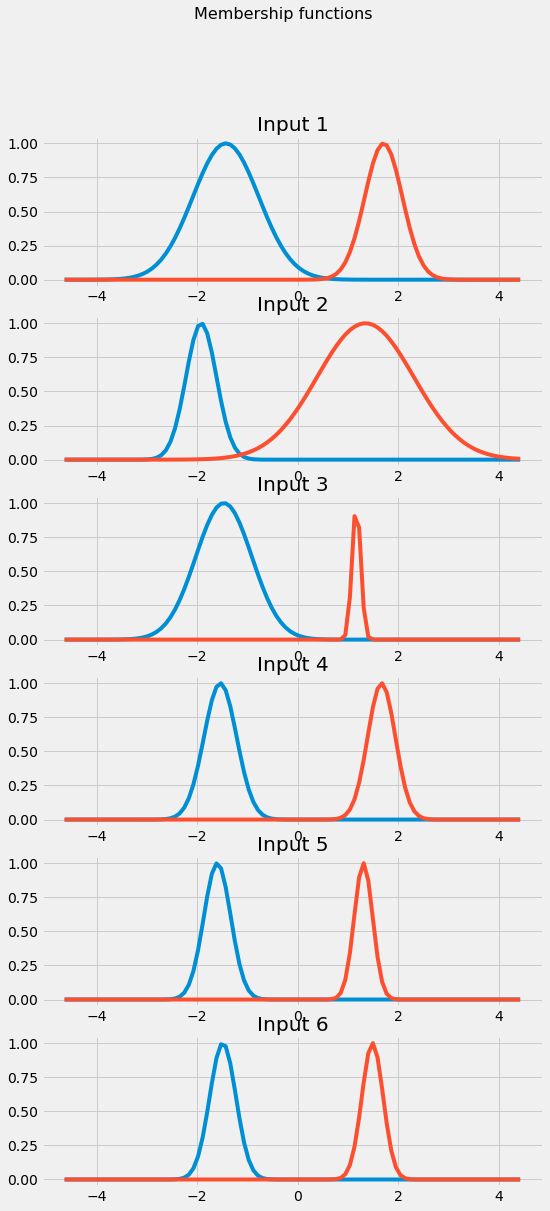

In [291]:
fis.plotmfs()

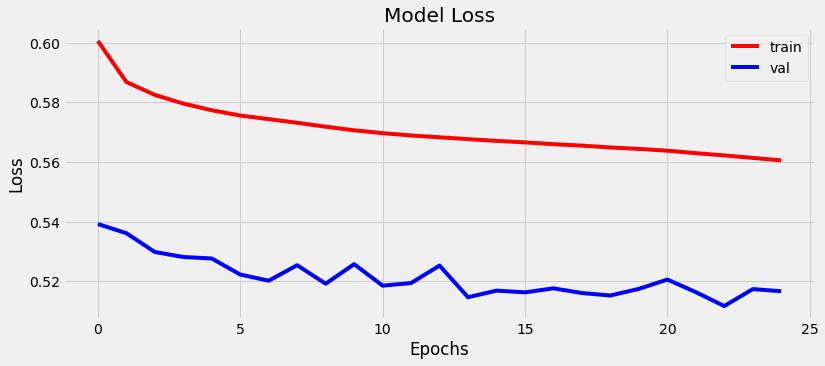

In [292]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

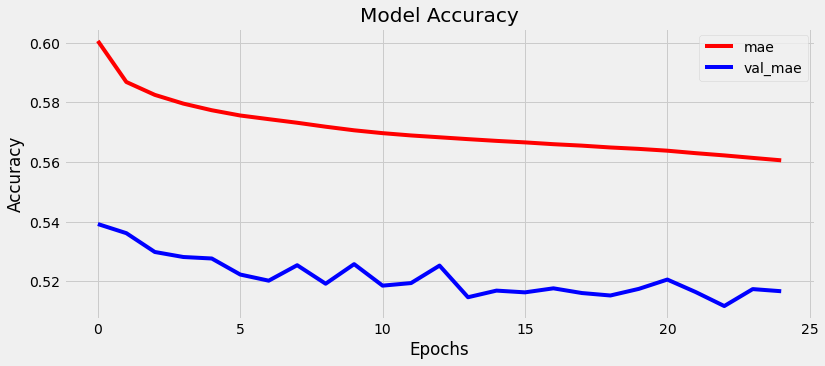

In [293]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['mae'], color='r')
plt.plot(history.history['val_mae'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['mae', 'val_mae'])
plt.show()

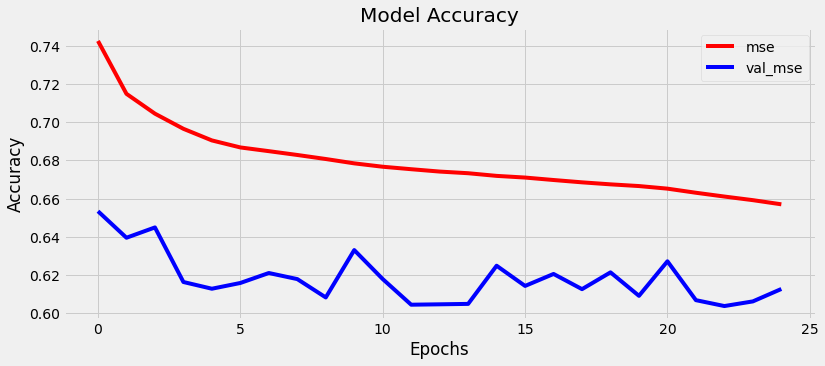

In [294]:
plt.figure(figsize=(12, 5))
plt.plot(history.history['mse'], color='r')
plt.plot(history.history['val_mse'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['mse', 'val_mse'])
plt.show()

In [295]:
anfis_y_pred = fis(X_test)
y_test = np.array(y_test).flatten()
anfis_y_pred = np.array(anfis_y_pred).flatten()
val_comp = pd.DataFrame({
    'Actual': y_test,
    'Predicted': anfis_y_pred
})

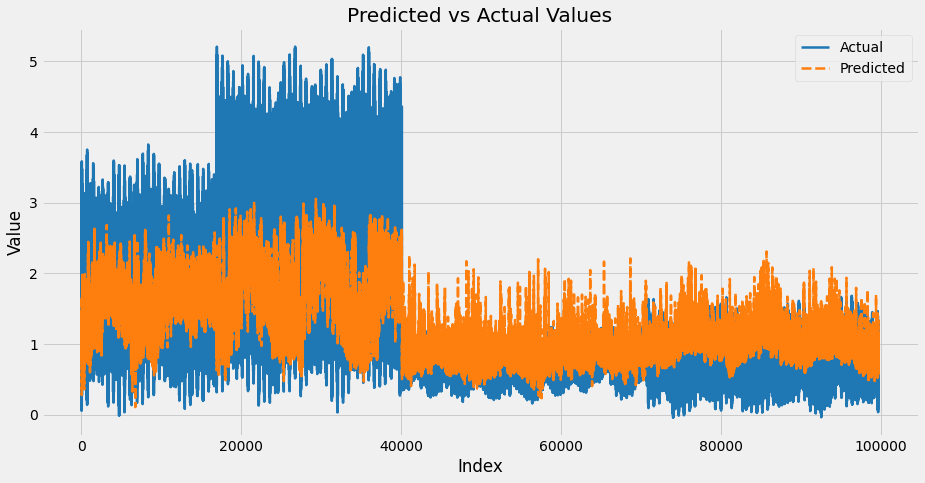

In [296]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=val_comp, palette="tab10", linewidth=2.5)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual Values')
plt.legend(labels=['Actual', 'Predicted'])
plt.show()

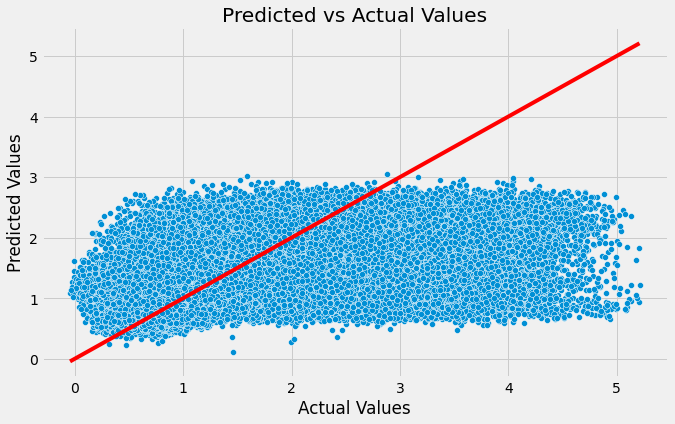

In [297]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=val_comp)
sns.lineplot(x='Actual', y='Actual', data=val_comp, color='red')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

In [298]:
ANFIS_mse = mean_squared_error(y_test, anfis_y_pred)
ANFIS_r_squared = r2_score(y_test, anfis_y_pred)
ANFIS_mae = mean_absolute_error(y_test, anfis_y_pred)
print("R-squared:", ANFIS_r_squared)
print("Mean Squared Error:", ANFIS_mse)
print("Mean Absolute Error:", ANFIS_mae)

R-squared: 0.32153498909434675
Mean Squared Error: 0.6126366189501533
Mean Absolute Error: 0.5167090324322394


____
# **Compare The Model**

In [299]:
prediction_score = pd.DataFrame(dict(model=['Linear Regression', 'ANFIS']
                             ,R_squared=[linReg_r_squared, ANFIS_r_squared]
                             ,MSE=[linReg_mse, ANFIS_mse]
                             ,MAE=[linReg_mae, ANFIS_mae]))
prediction_score

,model,R_squared,MSE,MAE
0,Linear Regression,0.290829,0.640364,0.574018
1,ANFIS,0.321535,0.612637,0.516709


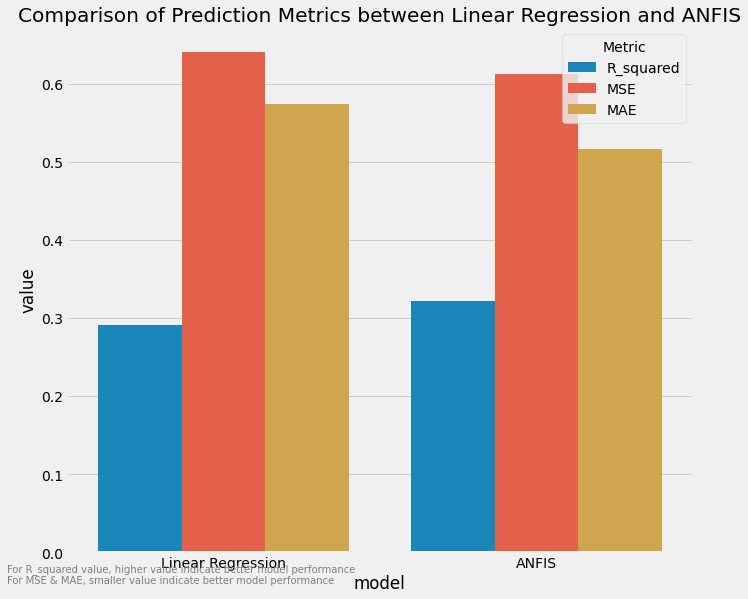

In [300]:
plt.figure(figsize=(10, 9))
sns.barplot(x='model', y='value', hue='variable', data=pd.melt(prediction_score, id_vars='model'))
plt.title('Comparison of Prediction Metrics between Linear Regression and ANFIS')
plt.legend(title='Metric', loc='upper right')
plt.text(-0.69, -0.04, "For R_squared value, higher value indicate better model performance\n\
For MSE & MAE, smaller value indicate better model performance", fontsize=10, color='gray')
plt.show()